# EDA HIGHLIGHT

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [EDA, R]
- image: images/numpy_logo.png

In [11]:
library(tidyverse)

Warning message:
"패키지 'tidyverse'는 R 버전 4.1.3에서 작성되었습니다"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"패키지 'ggplot2'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tibble'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tidyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'readr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'purrr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'dplyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'stringr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'forcats'는 R 버전 4.1.3에서 작성되었습니다"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Ch.1 R Language

- 생략

# Ch.2 Introduction to EDA

자료분석은 대체로 두 가지 단계로 나뉜다.

- 탐색적 자료분석(데이터의 구조와 특징 파악)

- 확증적 자료분석(모형, 재현성 평가)

## EDA(Exploratory Data Analysis)

- EDA는 데이터 특징과 내재하는 구조적 관계를 알아내기 위한 기법들을 통칭한다.

- 데이터를 특정한 모형에 적합시키기 보다는 데이터를 있는 그대로 보려는 데에 중점을 둔다.

## 4 Themes

EDA에서는 네 가지 주제가 때로는 홀로, 때로는 얽혀서 나타난다.

- 저항성(resistance)의 강조(예를 들어 평균보다는 일부자료의 파손에 저항적인 중위수가 바람직한 대표값 측도로서 선호된다.)

- 잔차(residual) 계산

- 자료변수의 재표현(re-expression)을 통한 다각적 시도

- 그래프를 통한 현시성(revelation)

## Summary (2)

- 자료분석은 탐색적 자료분석과 확증적 자료분석의 두 단계로 나눌 수 있다.

- EDA는 자료의 구조 및 특징의 파악을 목적으로 한다. 이를 위하여 효과적이고 신뢰성 있는 데이터의 요약과 그래프적 기법이 사용된다.

- EDA의 네 개 주제는 저항성, 잔차, 재표현, 현시성이다.

- 통계적 모형은 '진실'로서가 아니라 '주요 사례'로서 의미가 있다. 또한 모형과 데이터는 일방통행이 아닌 쌍방통행으로 이해되어야 한다. 데이터와 분석도 사이클을 이룬다.

# Ch.3 Stem and Leaf

## Stem and Leaf

데이터의 값을 십 단위인 줄기(stem)와 일 단위인 잎(leaf)으로 분리한다.

`-` 장점

- 사분위수나 중앙값을 찾기 쉽다.

- 분포의 전체적인 모양(봉우리 개수, 대칭분포, 치우친 방향)을 쉽게 알 수 있다.

- 이상값 유무를 파악할 수 있다.

`-` 단점

- 자료가 많은 경우에는 부적합하고 자료의 수가 50개 이하일 때 적합하다.

In [35]:
exam1 = read.table('dataset/EDA/exam1.txt', header = TRUE)
head(exam1)

,hw,score
,<int>,<int>
1,0,54
2,0,51
3,1,52
4,0,82
5,1,37
6,1,41


In [13]:
stem(exam1$score)


  The decimal point is 1 digit(s) to the right of the |

  0 | 00
  1 | 058
  2 | 1333458889
  3 | 0355789
  4 | 11133456678
  5 | 11122233344456688
  6 | 147779
  7 | 33478
  8 | 29
  9 | 09



- 이 줄기그림의 주요 특징은 이봉분포의 모습을 보인다는 점이다. 이것은 자료가 2개의 군집으로 되어 있음을 말한다.

In [22]:
# 과제 제출 여부에 따른 시험 점수

exam1[exam1$hw == 0, ]$score %>% stem # 과제 미제출자
exam1[exam1$hw == 1, ]$score %>% stem # 과제 제출자


  The decimal point is 1 digit(s) to the right of the |

  0 | 00
  1 | 05
  2 | 13334589
  3 | 0355
  4 | 13378
  5 | 122333446
  6 | 4
  7 | 3
  8 | 29


  The decimal point is 1 digit(s) to the right of the |

  1 | 8
  2 | 88
  3 | 789
  4 | 114566
  5 | 11245688
  6 | 17779
  7 | 3478
  8 | 
  9 | 09



과제 제출 여부에 따라서 줄기-잎 그림을 두 개 그려본 결과 흥미로운 점을 확인했다.

과제 미제출자에 경우 여전히 이봉분포를 띄고 있으나 과제 제출자의 경우 단봉분포를 띄고 있다.

이것은 과제물 미제출 그룹이 서로 이질적인 어떤 두 집단(50점대를 중심으로 하는 집단과 20점대를 중심으로 하는 집단)의 혼합임을 말하여 준다.

아마 전자는 학업습관이 불성실하나 학업능력은 우수한 집단이고 후자는 학업습관과 학업능력 모두 좋지 않은 학생들의 집단이 아닐까 생각해본다.

> Tip : R에서 줄기 수를 줄이거나 늘이려면 stem() 함수 내 scale 파라미터를 조정하면 된다.

In [25]:
stem(exam1$score, scale = 0.5) # 줄기 수를 절반으로 줄인다.


  The decimal point is 1 digit(s) to the right of the |

  0 | 00058
  2 | 13334588890355789
  4 | 1113345667811122233344456688
  6 | 14777933478
  8 | 2909



이 줄기 그림은 단봉분포의 형태를 취한다. 이것은 너무 단순하여 이 자료의 주요 특성을 잃은 것으로 볼 수 있다. 

즉 2개의 봉우리를 구분하지 못하고 1개만 본 것이다.

In [26]:
stem(exam1$score, scale = 2) # 줄기 수를 두 배로 늘인다.


  The decimal point is 1 digit(s) to the right of the |

  0 | 00
  0 | 
  1 | 0
  1 | 58
  2 | 13334
  2 | 58889
  3 | 03
  3 | 55789
  4 | 111334
  4 | 56678
  5 | 111222333444
  5 | 56688
  6 | 14
  6 | 7779
  7 | 334
  7 | 78
  8 | 2
  8 | 9
  9 | 0
  9 | 9



줄기 수를 늘였더니 더 많은 봉우리를 볼 수 있다.

일반적으로 줄기 수를 늘이면 늘일수록 많은 수의 봉우리를 보게 되고 그 반대로 줄기 수를 줄이면 줄일수록 적은 수의 봉우리를 보게 된다.

## Compared with Histogram

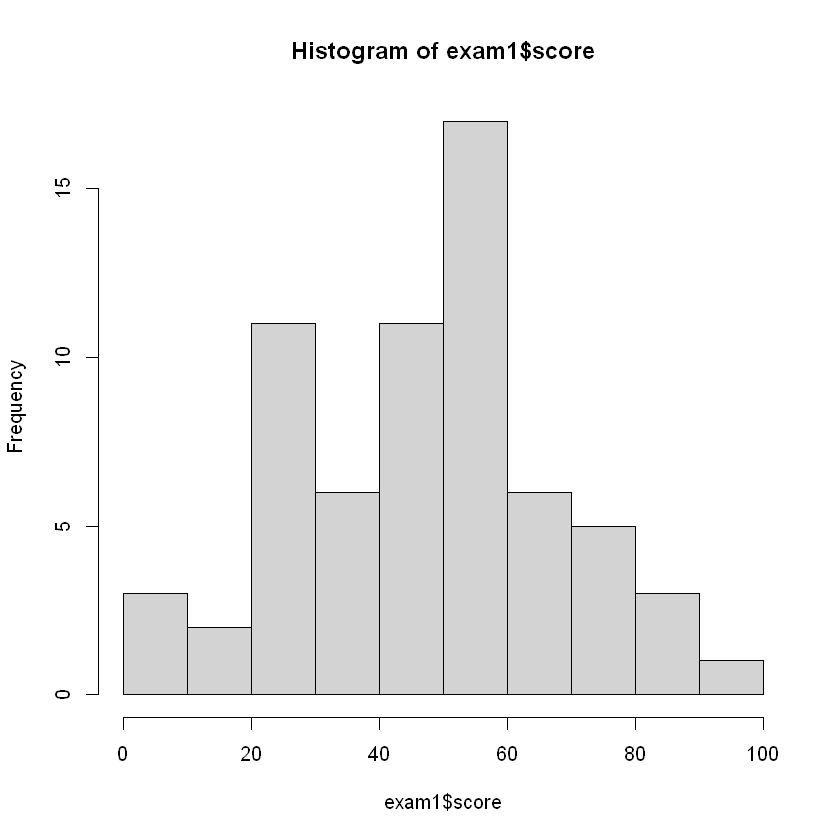

In [29]:
hist(exam1$score)

|        |줄기 - 잎|히스토그램|
|--------|--------|----------|
|정보 손실|손실되지 않음|손실됨|
|줄기 수 변환|쉬움|어려움|
|구간의 폭|조정 불가능|조정 가능|

## Summary (3)

- 줄기 그림은 히스토그램과 마찬가지로 자료 분포의 특성을 그래프화한 것이다. 줄기 그림은 히스토그램에 비하여 정보의 보전 면에서 우수하며 쉽게 구간(줄기) 수를 늘이거나 줄일 수 있다. 그러나 구간(줄기)의 선정시 제약이 따른다.

- 적절한 줄기 그림을 그리기 위하여 여러 개의 그림을 그려보고 비교해 보아야 한다. 계획된 시행착오가 필요하다.

- 줄기 그림에서는 다음과 같은 자료의 특성을 관찰할 수 있다.

  - 군집의 수
  - 집중도가 높은 구간
  - 대칭성 여부
  - 자료의 범위 및 산포
  - 특이점의 존재여부

# Ch.4 Numerical Summary and Box Plot

## Mean and Median

![](https://miro.medium.com/max/754/0*wHMvuwRa_YF9SFwY.png)

- 한 쪽 꼬리가 긴 분포에서 평균값은 쉽게 휘둘리지만 중앙값은 쉽게 휘둘리지 않다. 따라서 중앙값이 대표값으로서 적합하다.

$\begin{cases}
X_{\frac{N+1}{2}} \qquad if N = odd\\ \\
\dfrac{X_{\frac{N}{2}} + X_{\frac{N}{2} + 1}}{2} \qquad if N = even
\end{cases}$

## Five Number Summary

아래 4분위수 : $H_L$
중간값 : $M$
위 4분위수 : $H_U$

**다섯 숫자 요약 = (min, $H_L, M, H_U$, max) = (최솟값, 제 1사분위수, 중앙값, 제 3사분위수, 최댓값)**

In [41]:
summary(exam1$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   33.00   48.00   47.23   58.00   99.00 

## Skewness

**왜도** **=** $SKEW = \dfrac{(H_U - M) - (M - H_L)}{(H_U - M) + (M - H_L)}$

**왜도** < 0 이면 왼쪽으로 기울어진 분포

**왜도** > 0 이면 오른쪽으로 기울어진 분포

# Ch.5 Data Re-Expression

## 멱승, 로그, 지수 변환에 의한 재표현

## 표준화 변환

- 표준화 변환이란 통상적으로 한 자료묶음의 `평균이 0, 표준편차가 1이 되도록 하는 선형변환`을 말한다.

$x_1, x_2, \dots, x_n$을 자료 값이라고 할 때 이것의 표준화변환 $z_1, z_2, \dots, z_n$은 다음과 같이 정한다.

$z_i = \dfrac{x_i - \bar{x}}{s_x}, \, i = 1,2, \dots,n. \qquad(1)$

그런데 (1)은 로버스트하지 않은 $\bar{x}$와 $s_x$에 의존하므로 EDA의 관점에서는 믿고 사용하기 어렵다. [^1]

- 왜냐하면 표본평균과 표본표준편차는 극단적인 이상점에 의해 크게 변동될 수 있기 때문이다.
- 그러나 중앙값 또는 사분위수범위(IQR)은 비교적 로버스트하다. 

즉, 평균 $\bar{x}$ 대신에 중앙값 $med_x$를, 표준편차 $s_x$ 대신에 사분위수범위 $IQR$을 보정한 $\tilde{\sigma_x} = \dfrac{IQR}{1.35}$을 쓰는 것이 좋을 것이다.

따라서 로버스트 표준화 변환은 다음과 같다.

$\bar{z_i} = \dfrac{x_i - med_x}{\tilde{\sigma_x}}\, i = 1,2, \dots,n. \qquad(1)$

표준화 변환을 사용하는 예시 상황은 다음과 같다.

In [1]:
#hide_input
print('A 그룹 학생 100명의 시험 X 점수는 N(40,10)으로부터 생성되었다.')
print('B 그룹 학생 90명의 시험 Y 점수는 N(40,10)으로부터, 나머지 10명의 시험 Y 점수 N(80,5)으로부터 생성되었다.')

[1] "A 그룹 학생 100명의 시험 X 점수는 N(40,10)으로부터 생성되었다."
[1] "B 그룹 학생 90명의 시험 Y 점수는 N(40,10)으로부터, 나머지 10명의 시험 Y 점수 N(80,5)으로부터 생성되었다."


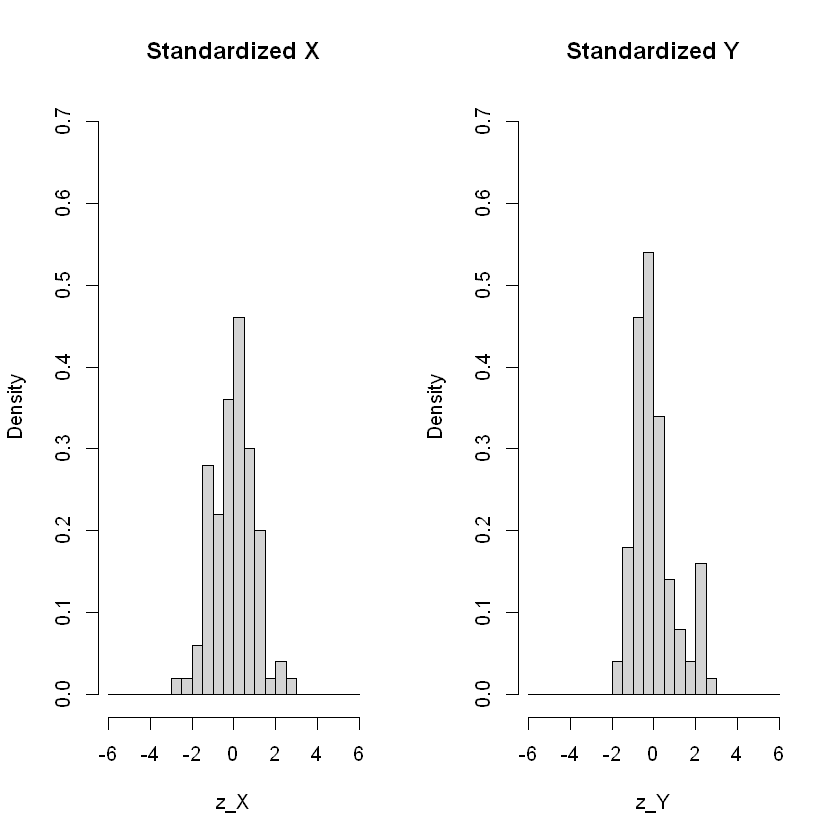

In [22]:
# 표준화 변환

par(mfrow = c(1,2))
X_group <- rnorm(100, 40, 10)
Y_group <- c(rnorm(90,40,10), rnorm(10,80,5))

z_X <- (X_group-mean(X_group))/sd(X_group)
z_Y <- (Y_group-mean(Y_group))/sd(Y_group)
hist(z_X, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Standardized X')
hist(z_Y, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Standardized Y')

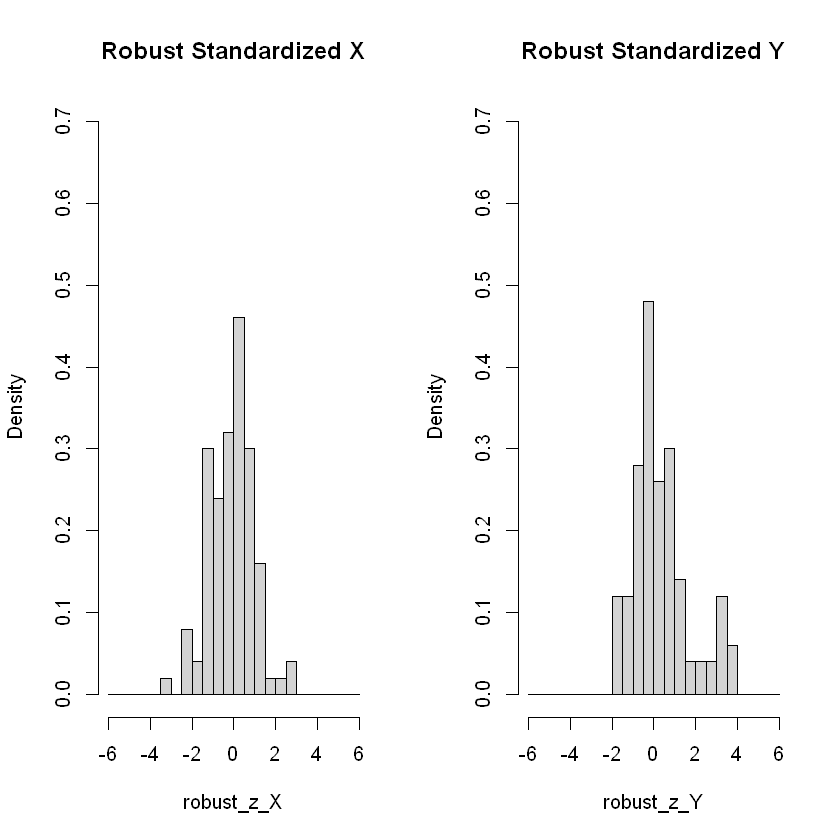

In [23]:
# 로버스트 표준화 변환

par(mfrow = c(1,2))
robust_z_X <- (X_group-median(X_group))/(IQR(X_group)/1.35)
robust_z_Y <- (Y_group-median(Y_group))/(IQR(Y_group)/1.35)
hist(robust_z_X, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Robust Standardized X')
hist(robust_z_Y, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Robust Standardized Y')

## Summary (5)

- 선형변환 $ax+b\, (a > 0)$은 분포의 형태를 바꾸지 않는다. 그러나 비선형변환은 분포의 형태를 바꾼다.

- 변환의 사다리는 $x^p$ 꼴의 파워(power, 멱승)형 변환을 일컫는데 변환의 사다리를 내려가면 $(p < 1)$ 오른쪽 꼬리가 짧아진다. $p=0$에 해당하는 변환은 로그변환이다.

- 자료의 재표현은 분포의 대칭화를 위하여, 또는 자료묶음들의 산포를 균일화하기 위한 목적으로 실행된다.

- 자료의 재표현은 자료 해석을 풍부하게 한다.

# ref ppt

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1940    3976    5466    6234    7427   14519 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.570   8.286   8.604   8.593   8.911   9.583 

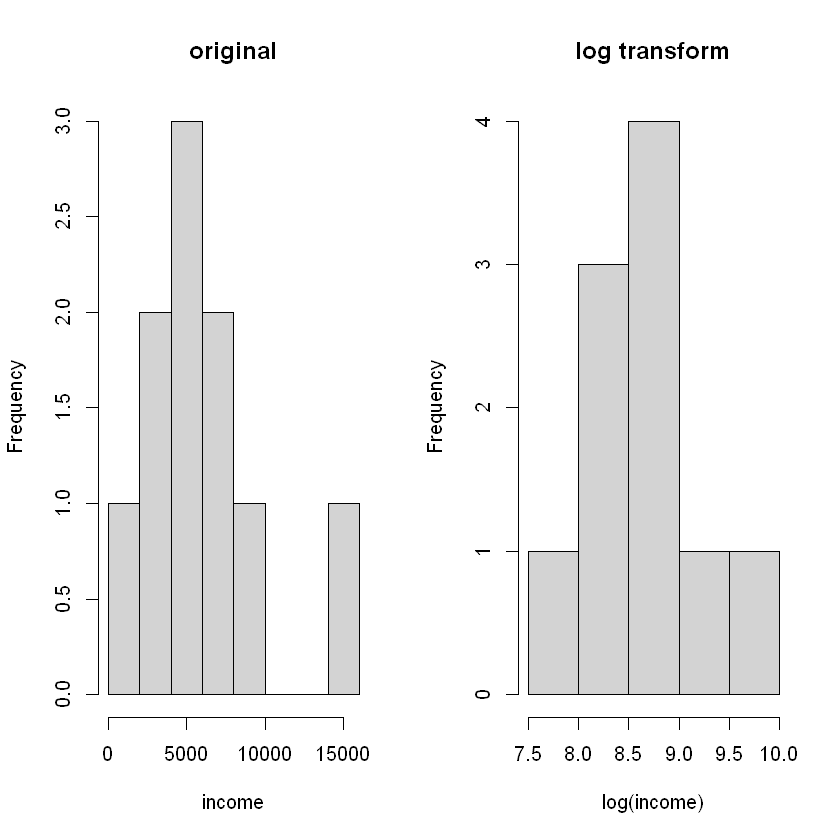

In [32]:
par(mfrow=c(1,2))
 income<-c(1940,3100,3818,4448,5088,5844,6640,7689,9257,14519)
hist(income, main = 'original')
hist(log(income), main = 'log transform')
summary(income)
summary(log(income))

- 오른쪽 꼬리가 길었으나 로그 변환으로 완화됨

In [ ]:
curve(x^(1/16), col = 'blue')
par(new=T)
curve(log(x), col = 'red')

[^1] 로버스트(robust) 한 통계량은 이상치/에러값으로 부터 영향을 크게 받지 않는 (건장한) 통계량

